In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [2]:
x = random.sample(range(0,99999999999999), 1100)
y = []
for i in x:
    y.append(2*i + 12)   # y = 2x + 12, m = 2 and c = 12



In [3]:
for i in range(1100):
    print(x[i])

19764030892843
49061912717283
81579649580136
23733467064283
53187468376842
54320912691175
27307863123933
55453378606877
20400744902253
83987977812861
1477054984566
20890553715854
96476822344013
9127253326788
64846354100180
26748718213942
2728067760389
65089847568716
7308586105076
89424644818413
86785708306536
37574844261522
46550503773738
16565409939548
92920496743682
2428967848355
95342584077131
21540250024681
65345380377881
15104043067393
4719389771993
99711892573037
93923910620335
90783641902026
70201599617268
54863076637896
30301161488708
22855897762454
30712906945877
1370281943021
14232187861985
4738079732802
19111136033492
10506469968456
61176627654925
82451905150027
94293265826310
87143794610603
17711267960770
57553899485709
86731580494069
66136531761710
54205512786973
26280283229112
73644145119174
48623514436754
72905127630587
63807780638832
88261909984791
6028670034542
23272107501134
22179073155248
90369254073995
49046540739693
15723720141788
6399062816228
76896434288458
64757

In [4]:
x = np.array(x)
y = np.array(y)

In [5]:
u = np.mean(x)
std = np.mean(x)

In [6]:
u

50472359164902.21

In [7]:
x = (x - u)/std
x

array([-0.60841872, -0.02794493,  0.61632329, ...,  0.62100399,
        0.78621518,  0.21914764])

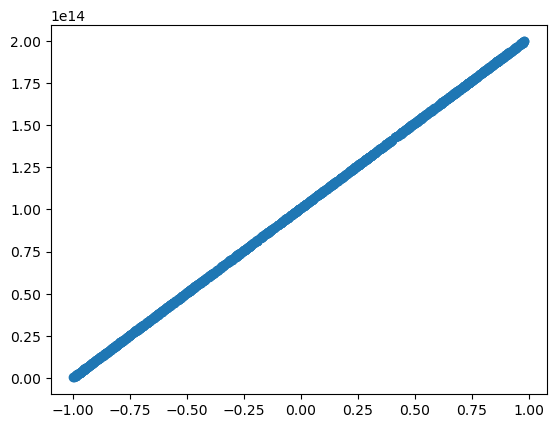

In [8]:
plt.scatter(x, y)

In [9]:
# h(x) = theta[0] + theta[1]*x

def hypothesis(X, theta):
    
    y_ = theta[0] + theta[1]*X
    return y_

In [10]:
# cost = (y_ - y_gt)**2
def cost(X, Y, theta):
    m = X.shape[0]
    
    total_loss = 0
    
    for i in range(m):
        
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        total_loss += (y_p - y_gt)**2
        
    return total_loss/m    

In [11]:
# grad = (h(x) - y_gt)*x[i]

def gradient(X, Y, theta):
    m = X.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        
        grad[0] += (y_p - y_gt)*1
        grad[1] += (y_p - y_gt)*X[i]
        
    return grad/m

In [12]:
def gradient_descent(X, Y, learning_rate = 0.3):
    
    theta = np.zeros((2, ))
    
    cost_epoch = []
    
    epochs = 10000
    
    for i in range(epochs):
        
        loss = cost(X,Y, theta)
        
        grad = gradient(X, Y, theta)
        
        cost_epoch.append(loss)
        
        
        theta[0] = theta[0] - learning_rate*grad[0]
        
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta, cost_epoch    

In [13]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

In [14]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1000,) (1000,) (100,) (100,)


In [15]:
theta, cost_epoch = gradient_descent(x_train, y_train, learning_rate =0.3 )

In [16]:
theta

array([1.00944718e+14, 1.00944718e+14])

In [17]:
cost_epoch

[1.36001751706432e+28,
 7.808822991631281e+27,
 4.7414964320191674e+27,
 3.054925365411123e+27,
 2.0817241024291368e+27,
 1.487510388648734e+27,
 1.1025401457507588e+27,
 8.389199168573746e+26,
 6.498073778091564e+26,
 5.0923144678580425e+26,
 4.020530532258065e+26,
 3.1892480710148354e+26,
 2.5372426591727286e+26,
 2.0221864311443546e+26,
 1.613484543185952e+26,
 1.2882687828899098e+26,
 1.0290376772894477e+26,
 8.221829634415414e+25,
 6.57014008531352e+25,
 5.2507709877224585e+25,
 4.196598835799649e+25,
 3.354190562895641e+25,
 2.680944081233493e+25,
 2.1428597769166083e+25,
 1.7127872142717997e+25,
 1.3690374128865648e+25,
 1.094280340643282e+25,
 8.746669581305736e+24,
 6.991290713780779e+24,
 5.588204865429627e+24,
 4.4667070593777315e+24,
 3.570283821838727e+24,
 2.853764202829248e+24,
 2.2810430124391635e+24,
 1.82326120285578e+24,
 1.457351538030977e+24,
 1.1648761858463654e+24,
 9.310976196698444e+23,
 7.4423599315999e+23,
 5.9487555852332125e+23,
 4.754902135422425e+23,
 3.8

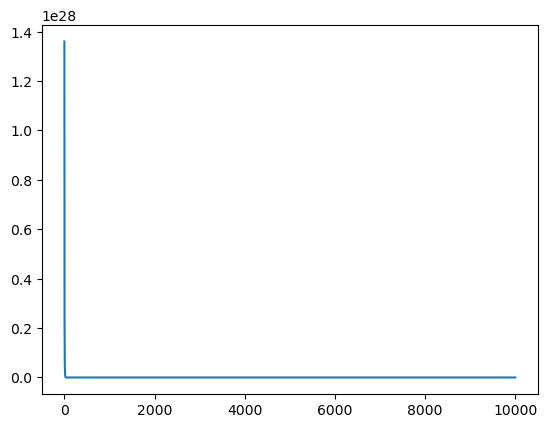

In [18]:
plt.plot(cost_epoch)

In [19]:
y_p = theta[0] + theta[1]*x_test

In [20]:
def r2_score(y_t, y_pred):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    
    score = (1- num/den)
    return score

In [21]:
r2_score(y_test, y_p)

1.0

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'Mean Squared error (MSE): = {mean_squared_error(y_test, y_p)}')
print(f'Mean absolute error (MAE): = {mean_absolute_error(y_test, y_p)}')
print(f'Root mean Squared error (RSME): = {np.sqrt(mean_squared_error(y_test, y_p))}')

Mean Squared error (MSE): = 0.0018890380859375
Mean absolute error (MAE): = 0.037734375
Root mean Squared error (RSME): = 0.04346306576781601
